# **Deadly Earthquakes - An Exploratory Data Analysis (EDA)**

## The project of The Smart Data Processing Systems and Data Science

*   Done by Samir Boudaa, id = 52739  (2nd year Master in Computer Science - Data Scientist)




## **Introduction**

This case study is a project to create a data story about the earthquake activities using the dataset provided by The National Earthquake Information Center (NEIC) where we will explore, process, analyze and visualize the collected data of NEIC about every earthquake with a reported magnitude 5.5 or higher since 1965, in order to gain insight into how the earthquakes behave and understand their activity mechanism to avoid the tremendous damages that cause and save people lives






## **About the NEIC:**

The National Earthquake Information Center (NEIC) is a part of the United States Geological Survey (USGS) and is responsible for monitoring and reporting earthquake activity worldwide. It serves as a central hub for collecting, monitoring, analyzing, and disseminating information related to earthquakes on a global scale. The NEIC plays a crucial role in earthquake research, monitoring seismic events, and providing earthquake information to the public and scientific communities.

### **Phase 1: ASK**

**1- business task:**

The earthquake activities, the way they behave and their mechanism, and which countries had highest magnitudes (for every earthquake with a reported magnitude 5.5 or higher since 1965)

**2- Key Stakeholders:**




* Mateusz Brajza (Our teacher)
* My classmate teams



### **Phase 2: PREPARE**

**1- About the data:**

The data is publicly available on the National Earthquake Information Center (NEIC) website and for this project it is available in the github repository provided by the teacher . This dataset includes a record of the date, time, location, depth, magnitude, and source of every earthquake with a reported magnitude 5.5 or higher since 1965. 

This data is credible, unbias and ROCCC (Reliable, Original, Comprehensive, Current, Cited). The data respected the privacy, security, openness and the accessibility aspects and checked for the integrity (the accuracy, completeness, consistency, and trustworthiness of data throughout its lifecycle).

**2- Installing and loading common packages and libraries:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from geopy.geocoders import Nominatim

**3- Upload the CSV file :**

In [3]:
earthquakes = pd. read_csv('earthquakes_db.csv')

**4- Exploring data which we have imported:**



*   **We can explore our data by using these following codes:**
earthquakes.head(); earthquakes.descripe; earthquakes.info ; earthquakes.dtypes; earthquakes.columns, earthquakes.shape;


*   **And we can also explore this data using histograms and boxplots**




In [4]:
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
earthquakes.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [6]:
earthquakes.shape

(23412, 21)

In [7]:
earthquakes.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [8]:
earthquakes.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

**Exploring the variables (exp: Magnitude, Type, Status and Magnitude Type ) using the visualizations**

a- Magnitude:

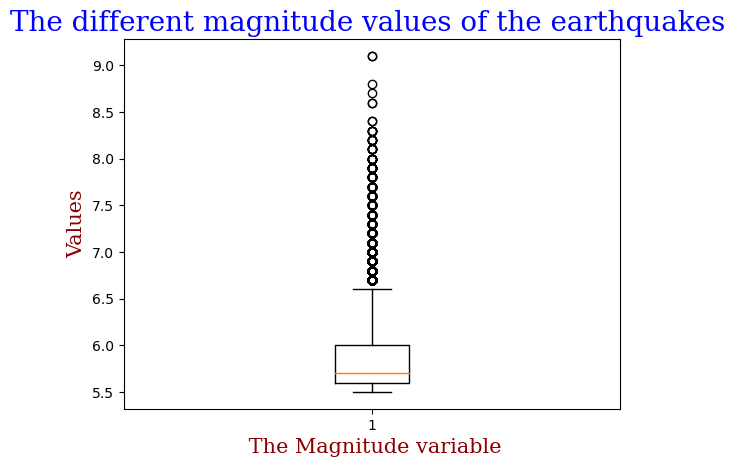

In [9]:
# fonts
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
# Create a boxplot
plt.boxplot(earthquakes['Magnitude'])
# Set axis labels and title
plt.title("The different magnitude values of the earthquakes ", fontdict = font1)
plt.xlabel(" The Magnitude variable", fontdict = font2)
plt.ylabel("Values", fontdict = font2)
# Display the plot
plt.show()

b- Type:

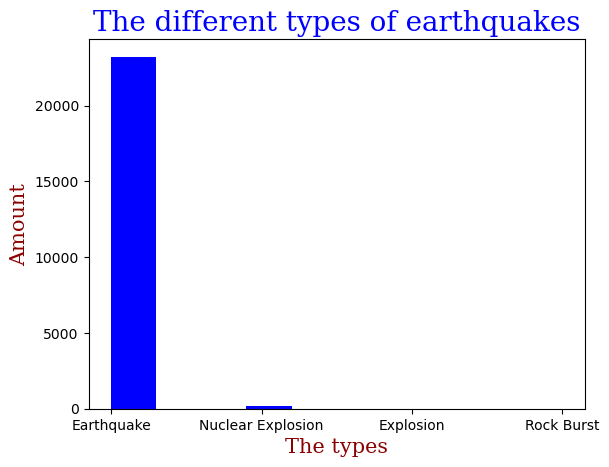

In [10]:
plt.title("The different types of earthquakes", fontdict = font1)
plt.xlabel("The types", fontdict = font2)
plt.ylabel("Amount", fontdict = font2)
plt.hist(earthquakes['Type'], color = "blue")
plt.show()

c- Status:

In [11]:
distinct_values = earthquakes['Status'].unique()
distinct_values

array(['Automatic', 'Reviewed'], dtype=object)

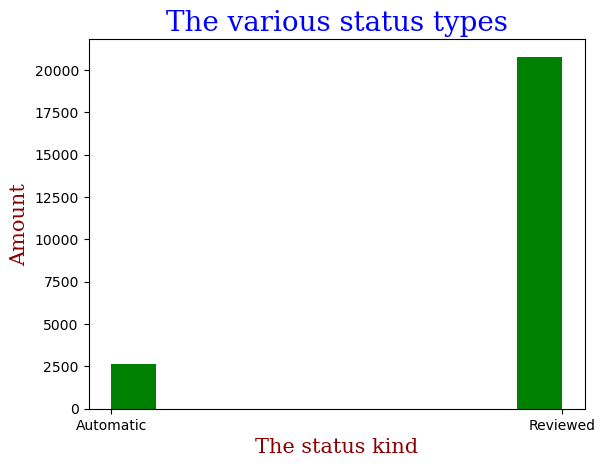

In [12]:
plt.title("The various status types", fontdict = font1)
plt.xlabel("The status kind", fontdict = font2)
plt.ylabel("Amount", fontdict = font2)
plt.hist(earthquakes['Status'], color = "green")
plt.show()

d- Magnitude Type:

In [13]:
distinct_values = earthquakes['Magnitude Type'].unique()
distinct_values

array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', nan, 'MWB', 'MWW',
       'MWR'], dtype=object)

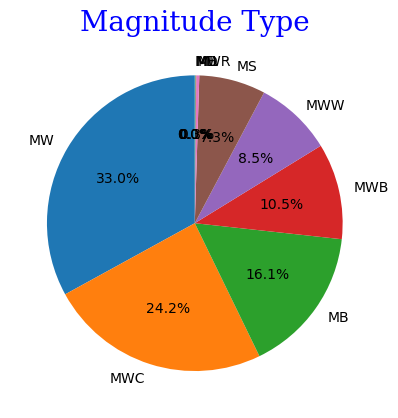

In [14]:
# Count the occurrences of each class
class_counts = earthquakes['Magnitude Type'].value_counts()

# Plot a pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Magnitude Type',fontdict = font1)
plt.show()

**5- Choosing the required data:**

Take only the needed data.

In [15]:
earthquakes = earthquakes [['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth','Magnitude', 'Magnitude Type', 'ID',
                            'Source', 'Location Source', 'Magnitude Source', 'Status']]

**6- Arranging the data:**

Sorting the data as we need it

In [16]:
earthquakes = earthquakes.sort_values(by=['Magnitude'], ascending=False)

In [17]:
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
20501,03/11/2011,05:46:24,38.297,142.373,Earthquake,29.0,9.1,MWW,OFFICIAL20110311054624120_30,OFFICIAL,US,OFFICIAL,Reviewed
17083,12/26/2004,00:58:53,3.295,95.982,Earthquake,30.0,9.1,MW,OFFICIAL20041226005853450_30,OFFICIAL,US,OFFICIAL,Reviewed
19928,02/27/2010,06:34:12,-36.122,-72.898,Earthquake,22.9,8.8,MWW,OFFICIAL20100227063411530_30,OFFICIAL,US,OFFICIAL,Reviewed
16,02/04/1965,05:01:22,51.251,178.715,Earthquake,30.3,8.7,MW,OFFICIAL19650204050122_30,OFFICIAL,ISCGEM,OFFICIAL,Automatic
17329,03/28/2005,16:09:37,2.085,97.108,Earthquake,30.0,8.6,MWW,OFFICIAL20050328160936530_30,OFFICIAL,US,OFFICIAL,Reviewed


### **Phase 3: PROCESS**

In this phase the data will be cleaned and manipulated to make it easy and ready to be analyzed in the next phase.

**1- Clean and Rename the Columns:**

We will format and do some changes to the columns.

*   Changing columns names
*   format dates (converting from character to date format)
*   Make sure columns names are unique and consistent.






In [18]:
# Changing the columns names
earthquakes = earthquakes.rename(columns={
 'Location Source': 'Location_Source',
 'Magnitude Source': 'Magnitude_Source'
})
# Convert the 'date' column to datetime format
earthquakes['Date'] = pd.to_datetime(earthquakes['Date'], utc=True)
# Clean column names
earthquakes = earthquakes.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [19]:
earthquakes.head()

,date,time,latitude,longitude,type,depth,magnitude,magnitude_type,id,source,location_source,magnitude_source,status
20501,2011-03-11 00:00:00+00:00,05:46:24,38.297,142.373,Earthquake,29.0,9.1,MWW,OFFICIAL20110311054624120_30,OFFICIAL,US,OFFICIAL,Reviewed
17083,2004-12-26 00:00:00+00:00,00:58:53,3.295,95.982,Earthquake,30.0,9.1,MW,OFFICIAL20041226005853450_30,OFFICIAL,US,OFFICIAL,Reviewed
19928,2010-02-27 00:00:00+00:00,06:34:12,-36.122,-72.898,Earthquake,22.9,8.8,MWW,OFFICIAL20100227063411530_30,OFFICIAL,US,OFFICIAL,Reviewed
16,1965-02-04 00:00:00+00:00,05:01:22,51.251,178.715,Earthquake,30.3,8.7,MW,OFFICIAL19650204050122_30,OFFICIAL,ISCGEM,OFFICIAL,Automatic
17329,2005-03-28 00:00:00+00:00,16:09:37,2.085,97.108,Earthquake,30.0,8.6,MWW,OFFICIAL20050328160936530_30,OFFICIAL,US,OFFICIAL,Reviewed


**2- Duplicate values :**

Check for duplicated data:

In [20]:
earthquakes.duplicated().sum()

0

Remove daplicated data:

In [21]:
earthquakes = earthquakes.drop_duplicates()

**3- Null values:**

Check for null values:

In [22]:
earthquakes.isna().sum()

date                0
time                0
latitude            0
longitude           0
type                0
depth               0
magnitude           0
magnitude_type      3
id                  0
source              0
location_source     0
magnitude_source    0
status              0
dtype: int64

Remove null values:

In [23]:
earthquakes = earthquakes.dropna()

In [24]:
earthquakes.isna().sum()

date                0
time                0
latitude            0
longitude           0
type                0
depth               0
magnitude           0
magnitude_type      0
id                  0
source              0
location_source     0
magnitude_source    0
status              0
dtype: int64

### **Phase 4: ANALYZE**

In this step we will do some transformations to the given datasets in order to extract information and knowledge.

**1- Add a column "year":**

In [25]:
earthquakes['years'] =  pd.to_datetime(earthquakes['date']).dt.year

In [26]:
earthquakes.head()

,date,time,latitude,longitude,type,depth,magnitude,magnitude_type,id,source,location_source,magnitude_source,status,years
20501,2011-03-11 00:00:00+00:00,05:46:24,38.297,142.373,Earthquake,29.0,9.1,MWW,OFFICIAL20110311054624120_30,OFFICIAL,US,OFFICIAL,Reviewed,2011
17083,2004-12-26 00:00:00+00:00,00:58:53,3.295,95.982,Earthquake,30.0,9.1,MW,OFFICIAL20041226005853450_30,OFFICIAL,US,OFFICIAL,Reviewed,2004
19928,2010-02-27 00:00:00+00:00,06:34:12,-36.122,-72.898,Earthquake,22.9,8.8,MWW,OFFICIAL20100227063411530_30,OFFICIAL,US,OFFICIAL,Reviewed,2010
16,1965-02-04 00:00:00+00:00,05:01:22,51.251,178.715,Earthquake,30.3,8.7,MW,OFFICIAL19650204050122_30,OFFICIAL,ISCGEM,OFFICIAL,Automatic,1965
17329,2005-03-28 00:00:00+00:00,16:09:37,2.085,97.108,Earthquake,30.0,8.6,MWW,OFFICIAL20050328160936530_30,OFFICIAL,US,OFFICIAL,Reviewed,2005


**2- The maximum magnitude and depth:**

a - Magnitude:

In [27]:
# Find the row with the maximum value in magnitude column
max_magnitude = earthquakes.loc[earthquakes['magnitude'].idxmax()]
max_magnitude

date                   2011-03-11 00:00:00+00:00
time                                    05:46:24
latitude                                  38.297
longitude                                142.373
type                                  Earthquake
depth                                       29.0
magnitude                                    9.1
magnitude_type                               MWW
id                  OFFICIAL20110311054624120_30
source                                  OFFICIAL
location_source                               US
magnitude_source                        OFFICIAL
status                                  Reviewed
years                                       2011
Name: 20501, dtype: object

In [28]:
print(f' The maximum magnitude is : {max_magnitude.magnitude}')

 The maximum magnitude is : 9.1


b - Depth:

In [29]:
# Find the row with the maximum value in depth
max_depth = earthquakes.loc[earthquakes['depth'].idxmax()]
max_depth

date                1985-10-22 00:00:00+00:00
time                                 19:14:02
latitude                              -20.158
longitude                            -179.163
type                               Earthquake
depth                                   700.0
magnitude                                 5.5
magnitude_type                             MB
id                                 USP0002M15
source                                     US
location_source                            US
magnitude_source                           US
status                               Reviewed
years                                    1985
Name: 7734, dtype: object

In [30]:
print(f' The maximum depth is : {max_depth.depth}')

 The maximum depth is : 700.0


**3- The minimum magnitude and depth:**

a - Magnitude:

In [31]:
# Find the row with the minimum value in column magnitude
min_magnitude_record = earthquakes.loc[earthquakes['magnitude'].idxmin()]
min_magnitude_record

date                1979-12-12 00:00:00+00:00
time                                 08:14:50
latitude                                2.149
longitude                             -79.393
type                               Earthquake
depth                                    33.0
magnitude                                 5.5
magnitude_type                             MB
id                                 USP00014EZ
source                                     US
location_source                            US
magnitude_source                           US
status                               Reviewed
years                                    1979
Name: 5375, dtype: object

In [32]:
print(f' The minimum magnitude is : {min_magnitude_record.magnitude}')

 The minimum magnitude is : 5.5


b - Depth:

In [33]:
min_depth_record = earthquakes.loc[earthquakes['depth'].idxmin()]
min_depth_record

date                1992-06-28 00:00:00+00:00
time                                 12:00:45
latitude                               34.131
longitude                            -116.408
type                               Earthquake
depth                                    -1.1
magnitude                                5.77
magnitude_type                             ML
id                                  CI3043549
source                                     CI
location_source                            CI
magnitude_source                           CI
status                               Reviewed
years                                    1992
Name: 10978, dtype: object

In [34]:
print(f' The mininmum depth is : {min_depth_record.depth}')

 The mininmum depth is : -1.1


**4- The average of magnitude and depth:**

a- Magnitude:

In [35]:
average_magnitude_record = earthquakes['magnitude'].mean()
print(f' The average magnitude is : {average_magnitude_record}')

 The average magnitude is : 5.882553291469093


b- Depth:

In [36]:
average_depth_record = earthquakes['depth'].mean()
print(f' The average depth is : {average_depth_record}')

 The average depth is : 70.77569473279509


**5 - Check for correlation:**

Check for all variables:

In [37]:
correlation_matrix = earthquakes.corr()
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           latitude  longitude     depth  magnitude     years
latitude   1.000000   0.203789 -0.080951   0.035055 -0.076232
longitude  0.203789   1.000000 -0.085953   0.038514 -0.037551
depth     -0.080951  -0.085953  1.000000   0.023432 -0.024041
magnitude  0.035055   0.038514  0.023432   1.000000 -0.032045
years     -0.076232  -0.037551 -0.024041  -0.032045  1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_13116\3080497820.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = earthquakes.corr()


**6 - The top 3 highest magnitude records**

In [38]:
# Extract the top 3 maximum records of the magnitude
top_3_max_records = earthquakes.nlargest(3, 'magnitude')

# Display the top 3 maximum records
print("Top 3 Maximum Records of Magnitude:")
top_3_max_records.head()

Top 3 Maximum Records of Magnitude:


,date,time,latitude,longitude,type,depth,magnitude,magnitude_type,id,source,location_source,magnitude_source,status,years
20501,2011-03-11 00:00:00+00:00,05:46:24,38.297,142.373,Earthquake,29.0,9.1,MWW,OFFICIAL20110311054624120_30,OFFICIAL,US,OFFICIAL,Reviewed,2011
17083,2004-12-26 00:00:00+00:00,00:58:53,3.295,95.982,Earthquake,30.0,9.1,MW,OFFICIAL20041226005853450_30,OFFICIAL,US,OFFICIAL,Reviewed,2004
19928,2010-02-27 00:00:00+00:00,06:34:12,-36.122,-72.898,Earthquake,22.9,8.8,MWW,OFFICIAL20100227063411530_30,OFFICIAL,US,OFFICIAL,Reviewed,2010


**7 - The top 3 lowest magnitude records**  

In [39]:
# Extract the 3 smallest records of magnitude
top_3_min_records = earthquakes.nsmallest(3, 'magnitude')
# Display the 3 smallest records
print("Top 3 Smallest Records of Column2:")
top_3_min_records

Top 3 Smallest Records of Column2:


,date,time,latitude,longitude,type,depth,magnitude,magnitude_type,id,source,location_source,magnitude_source,status,years
5375,1979-12-12 00:00:00+00:00,08:14:50,2.149,-79.393,Earthquake,33.0,5.5,MB,USP00014EZ,US,US,US,Reviewed,1979
6238,1982-07-10 00:00:00+00:00,12:04:40,-55.985,146.843,Earthquake,10.0,5.5,MS,USP0001NBM,US,US,US,Reviewed,1982
6256,1982-08-06 00:00:00+00:00,20:46:14,-8.319,120.416,Earthquake,49.9,5.5,MB,USP0001NVY,US,US,US,Reviewed,1982


**8- Add a column that represents the countries that coresspond to the latitudes and longitudes:** :

In [40]:
# Initialize geolocator
geolocator = Nominatim(user_agent="my_geocoder")

# Function to get country name from coordinates with error handling
def get_country_name(row):
    try:
        location = geolocator.reverse((row['latitude'], row['longitude']), language='en')
        if location is not None and 'address' in location.raw and 'country' in location.raw['address']:
            return location.raw['address']['country']
        else:
            return 'Unknown'
    except Exception as e:
        # Handle the exception, e.g., print an error message and return a default value
        print(f"Error: {e}")
        return 'Unknown'

# Add a new column 'Country' to the DataFrame
top_3_max_records['Country'] = top_3_max_records.apply(get_country_name, axis=1)
top_3_min_records['Country'] = top_3_min_records.apply(get_country_name, axis=1)
# Display the updated DataFrame
top_3_max_records.head()


,date,time,latitude,longitude,type,depth,magnitude,magnitude_type,id,source,location_source,magnitude_source,status,years,Country
20501,2011-03-11 00:00:00+00:00,05:46:24,38.297,142.373,Earthquake,29.0,9.1,MWW,OFFICIAL20110311054624120_30,OFFICIAL,US,OFFICIAL,Reviewed,2011,Unknown
17083,2004-12-26 00:00:00+00:00,00:58:53,3.295,95.982,Earthquake,30.0,9.1,MW,OFFICIAL20041226005853450_30,OFFICIAL,US,OFFICIAL,Reviewed,2004,Indonesia
19928,2010-02-27 00:00:00+00:00,06:34:12,-36.122,-72.898,Earthquake,22.9,8.8,MWW,OFFICIAL20100227063411530_30,OFFICIAL,US,OFFICIAL,Reviewed,2010,Chile


In [41]:
top_3_min_records.head()

,date,time,latitude,longitude,type,depth,magnitude,magnitude_type,id,source,location_source,magnitude_source,status,years,Country
5375,1979-12-12 00:00:00+00:00,08:14:50,2.149,-79.393,Earthquake,33.0,5.5,MB,USP00014EZ,US,US,US,Reviewed,1979,Unknown
6238,1982-07-10 00:00:00+00:00,12:04:40,-55.985,146.843,Earthquake,10.0,5.5,MS,USP0001NBM,US,US,US,Reviewed,1982,Unknown
6256,1982-08-06 00:00:00+00:00,20:46:14,-8.319,120.416,Earthquake,49.9,5.5,MB,USP0001NVY,US,US,US,Reviewed,1982,Indonesia


In [42]:
top_3_max_country_records =  {
                              'country': ['Japan','Indonesia', 'Chile'],
                              'magnitude': [9.1,9.1,8.8]
                              }
top_3_min_country_records =  {
                              'country': ['Equador', 'Australia', 'Indonesia'],
                              'magnitude': [5.5,5.5,5.5]
                              }
top_3_max_country_records = pd.DataFrame(top_3_max_country_records)
top_3_min_country_records = pd.DataFrame(top_3_min_country_records)

## **Phase 5: SHARE**

**1 - Check the correlation between the magnitude and depth :**

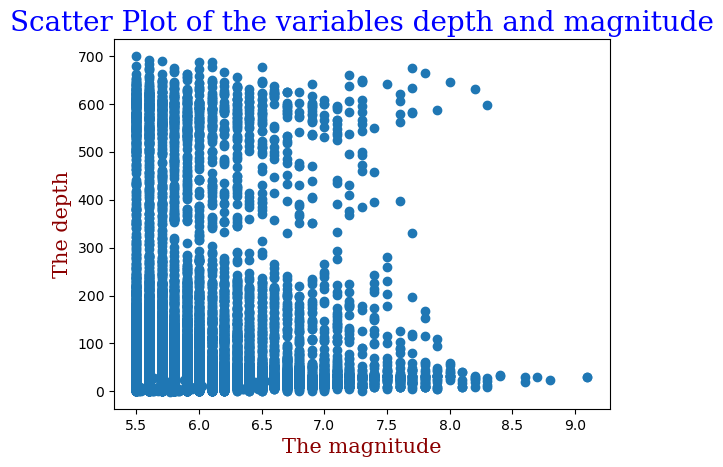

In [43]:
x = earthquakes['magnitude']
y = earthquakes['depth']
# Create a scatter plot
plt.scatter(x, y)
# Add labels and title
plt.xlabel('The magnitude',fontdict = font2)
plt.ylabel('The depth', fontdict = font2)
plt.title('Scatter Plot of the variables depth and magnitude', fontdict = font1)
# Show the plot
plt.show()

We notice from this scatter plot that there is no linear correlation between the magnitude and the depth

**2- The earthquake location of highest magnitude :**

C:\Users\Admin\AppData\Local\Temp\ipykernel_13116\3463089203.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


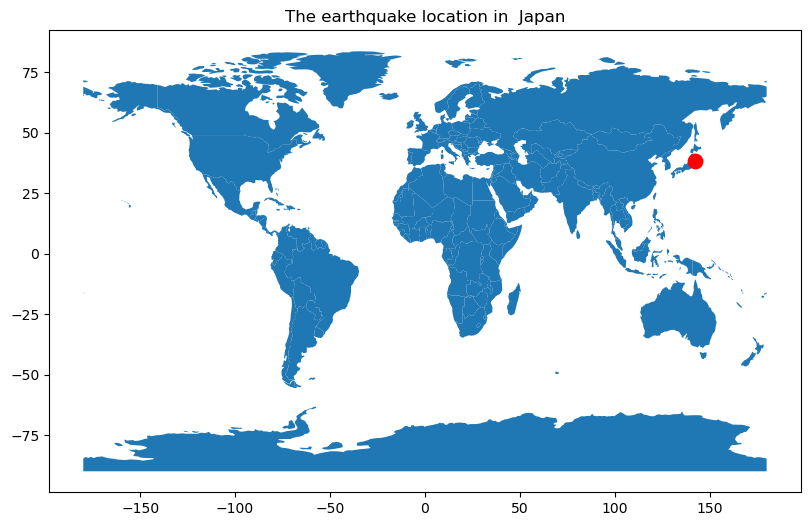

In [44]:
country_name = 'Japan'
latitude = max_magnitude.latitude
longitude = max_magnitude.longitude

# Create a GeoDataFrame with a single point representing the country
geometry = [Point(longitude, latitude)]
geo_df = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")

# Load the world map shapefile (or another appropriate shapefile)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot the country point on top
geo_df.plot(ax=ax, color='red', markersize=108)

# Set plot title
plt.title(f"The earthquake location in  {country_name}")

# Show the plot
plt.show()

**3- The earthquake location of lowest magnitude :**  

C:\Users\Admin\AppData\Local\Temp\ipykernel_13116\3925680550.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


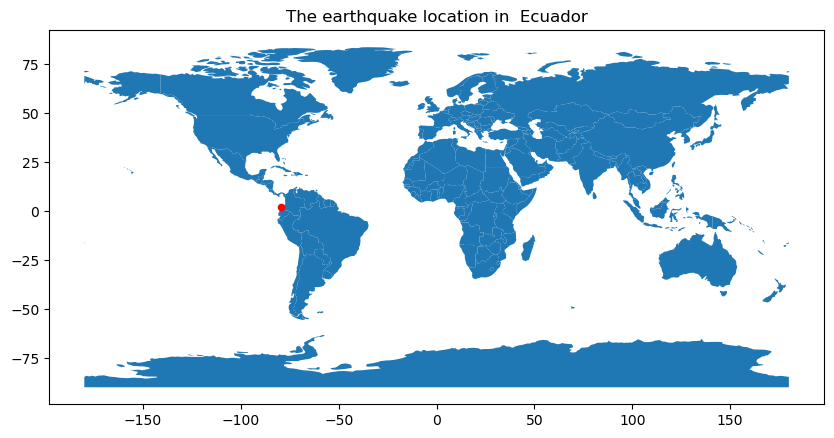

In [45]:
country_name = 'Ecuador'
latitude = min_magnitude_record.latitude
longitude = min_magnitude_record.longitude

# Create a GeoDataFrame with a single point representing the country
geometry = [Point(longitude, latitude)]
geo_df = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")

# Load the world map shapefile (or another appropriate shapefile)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot the country point on top
geo_df.plot(ax=ax, color='red', markersize=20)

# Set plot title
plt.title(f"The earthquake location in  {country_name}")

# Show the plot
plt.show()

**4 - The top 3 highest magnitudes record countries**

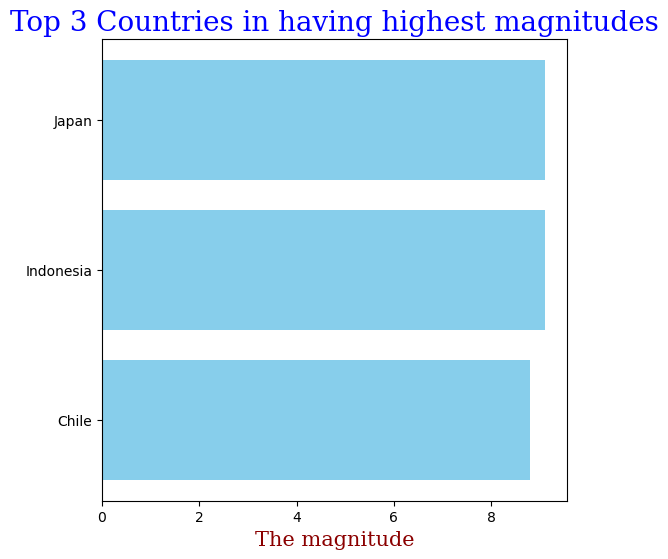

In [46]:
plt.figure(figsize=(6, 6))
plt.barh(top_3_max_country_records['country'], top_3_max_country_records['magnitude'], color='skyblue')
plt.xlabel('The magnitude',fontdict = font2)
plt.title('Top 3 Countries in having highest magnitudes', fontdict = font1)
plt.gca().invert_yaxis()  # To have the highest production at the top
plt.show()

This horizontal bar chart illustrates the top 3 countries that have the highest earthquake magnitude which are Japan, Indonesia and Chile

**5 - The top 3 lowest magnitudes record countries**

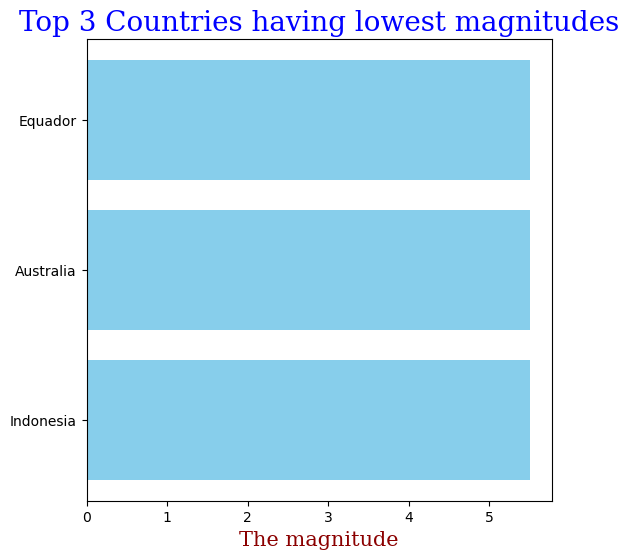

In [47]:
plt.figure(figsize=(6, 6))
plt.barh(top_3_min_country_records['country'], top_3_min_country_records['magnitude'], color='skyblue')
plt.xlabel('The magnitude',fontdict = font2)
plt.title('Top 3 Countries having lowest magnitudes', fontdict = font1)
plt.gca().invert_yaxis()  # To have the highest production at the top
plt.show()

This horizontal bar chart shows the top 3 countries that have the lowest earthquake magnitudes which are Australia, Indonesia and Equador

**6 - Findings:**

From this data analysis we conclude that the following countries; Japan, Indonesia and Chile had experienced the highest earthquake magnitudes

## **Phase 6: ACT**

Based on the analysis, some of the insights/recommendations for the countries with hight earthquak avtivity:

*   Create an Emergency Plan.
*   Secure Heavy Furniture and Objects.
*   Building Safety.
*   Know Safe Locations.
*   Evacuation Plans.
*   Community Preparedness.









